# Fuerza de Drag y Área
---------------------------------

In [2]:
!pip install CoolProp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 5.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [4]:
!pip install ht
!pip install fluids

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 2.6 MB/s eta 0:00:00m eta 0:00:010:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.7 MB/s eta 0:00:00m eta 0:00:010:01:01


In [1]:
#importo librerias que voy a implementar
%matplotlib 
import numpy as np
# para cálculos algebraicos
import matplotlib.pyplot as plt
#para realizar gráficos
import pandas as pd
#para display en cuadros
import CoolProp.CoolProp as cp
#para disponer de las propiedades de los fluidos en cuestión
import ht
import fluids
from IPython.display import Latex

Using matplotlib backend: Qt5Agg


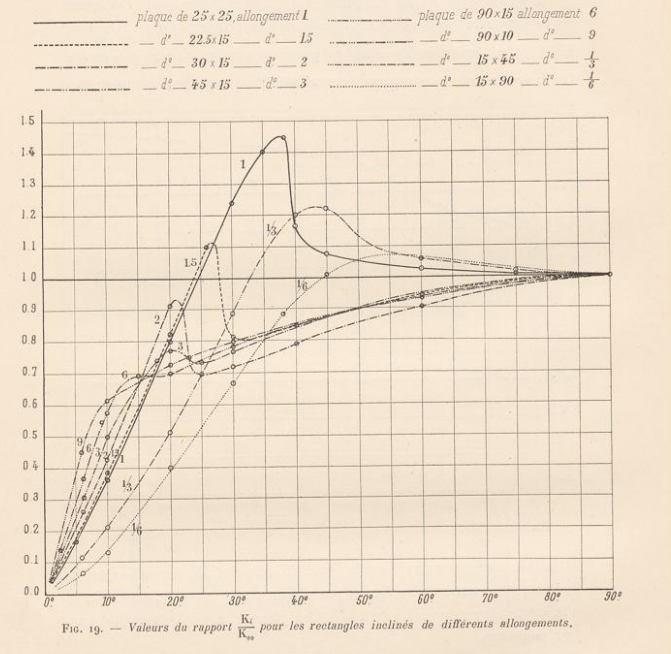

In [6]:
from IPython.display import Image
Image(filename='/home/lucas/TESIS/plot_drag.png') 

$$Re=\frac{U h}{\nu}$$

+ Para placa vertical, siendo h su altura y b su largo

+ Eiffel en su experiencia utiliza velocidad promedio de 12m/s con aire a temperatura $T=15^{\circ}$, $P=760mm$

+ Aquellas placas que presentan la crisis que buscamos son aquellas con relación de aspecto $R=b/h$

$$R=2 \quad R=1.5$$

+ con placas de 22.5 x 15 cm y 30 x 15 cm

In [2]:
# Propiedades físicas del aire 
# Busco determinar Reynolds de la experiencia de Eiffel

h=15 /100 #m
P=101325 #pa
T=15 + 273 #K
U_aire =10 #m/s

rho_aire=cp.PropsSI("D","T",T,"P",P,"air")
#aclaración ellos toman rho = 1.225 

mu_aire=cp.PropsSI("V","T",T,"P",P,"air")

nu_aire=mu_aire/rho_aire #m2/s
Re= U_aire*h/nu_aire

print("Número de Reynolds utilizado: ", Re)

Número de Reynolds utilizado:  102442.34185204051


## Determino Area

+ Por convención adoptamos Reynolds $10^5$
+ Tenemos velocidades en el canal que van desde 0.4 a 4 m/s
+ Profundidad de canal 1.8m, para despreciar efectos de superficie libre necesitamos al menos 2h de distancia

$$A=h^{2}*R$$

In [23]:
#busco altura necesaria para cumplir con el reynolds

U_canal_max=4 #m/s
U_canal_min=0.4 #m/s 


#propiedades físicas del agua

T_ref= 15 + 273
P=101325

rho_agua=cp.PropsSI("D","T",T_ref,"P",P,"water")
mu_agua=cp.PropsSI("V","T",T_ref,"P",P,"water")
nu_agua=mu_agua/rho_agua


h_1=Re*nu_agua/U_canal_max
h_2=Re*nu_agua/U_canal_min


#armo array de h

h=np.linspace(h_2,h_1,15)


#paso el array a lista
h_lista=(h*100).tolist()
h_lista=['%.1f' % elem for elem in h_lista]
#Relación de aspecto a tomar:
r_15= 1.5
r_2= 2

#Calculo Areas para r=2

A_15=h**2*r_15 #m2
A_2=h**2*r_2 #m2

#paso las areas a listas y la expreso en cm2
A_15_cm=A_15*(100*100)
A_2_cm=A_2*(100*100)

A_15_lista=A_15_cm.tolist()
A_15_lista=['%.1f' % elem for elem in A_15_lista ]


A_2_lista=A_2_cm.tolist()
A_2_lista=['%.1f' % elem for elem in A_2_lista ]

d={"Valores de h en cm":h_lista,"Área para r=1.5 en cm2":A_15_lista, "Área para r=2 en m2":A_2_lista}
df=pd.DataFrame(data=d)
df



,Valores de h en cm,Área para r=1.5 en cm2,Área para r=2 en m2
0,29.3,1285.6,1714.1
1,27.4,1125.6,1500.8
2,25.5,976.3,1301.7
3,23.6,837.5,1116.7
4,21.7,709.4,945.9
5,19.9,592.0,789.3
6,18.0,485.1,646.8
7,16.1,388.9,518.5
8,14.2,303.3,404.4
9,12.3,228.3,304.4


## Cálculo de fuerzas

In [39]:
#considero Cd para placa completamente vertical
Cd=1.28/9.8 #para q los resultados de las fuerzas me queden en kilos tomando g=9.8

U_setup=0.8
#calculo valores de fuerzas para velo máxima 

F_max_15=1/2*rho_agua*A_15*Cd*U_setup**2

F_max_15.tolist()
F_max_15=['%.1f' % elem for elem in F_max_15 ]

F_max_2=1/2*rho_agua*A_2*Cd*U_setup**2

F_max_2.tolist()
F_max_2=['%.1f' % elem for elem in F_max_2 ]

#Calculo valores de fuerzas para velo mínima

F_min_15=1/2*rho_agua*A_15*Cd*U_canal_min**2

F_min_15.tolist()
F_min_15=['%.1f' % elem for elem in F_min_15 ]

F_min_2=1/2*rho_agua*A_2*Cd*U_canal_min**2

F_min_2.tolist()
F_min_2=['%.1f' % elem for elem in F_min_2 ]
#calculo valores de Reynolds para 1.5m/s

Re_r=U_setup*h/nu_agua
Re_r.tolist()
Re_r=['%.0f' % elem for elem in Re_r ]
#ploteo la info

plot_r15={"Área para r=1.5 en cm2":A_15_lista,"h(cm)":h_lista,"Fmax r=1.5 (kg)":F_max_15,"Fmin r=1.5(kg)":F_min_15,"Reynolds":Re_r, "Velocidad m/s":U_setup}
df2=pd.DataFrame(data=plot_r15)



def custom_style(row):

    color = 'white'
    if row.values[1] == "19.9":
        color = 'yellow'

    return ['background-color: %s' % color]*len(row.values)

df2.style.apply(custom_style, axis=1)


,Área para r=1.5 en cm2,h(cm),Fmax r=1.5 (kg),Fmin r=1.5(kg),Reynolds,Velocidad m/s
0,1285.6,29.3,5.4,1.3,204885,0.800000
1,1125.6,27.4,4.7,1.2,191714,0.800000
2,976.3,25.5,4.1,1.0,178542,0.800000
3,837.5,23.6,3.5,0.9,165371,0.800000
4,709.4,21.7,3.0,0.7,152200,0.800000
5,592.0,19.9,2.5,0.6,139029,0.800000
6,485.1,18.0,2.0,0.5,125858,0.800000
7,388.9,16.1,1.6,0.4,112687,0.800000
8,303.3,14.2,1.3,0.3,99515,0.800000
9,228.3,12.3,1.0,0.2,86344,0.800000


In [40]:
plot_r2={"Área para r=2 en cm2":A_2_lista,"h(cm)":h_lista,"Fmax r=2 (kg)":F_max_2,"Fmin r=2(kg)":F_min_2,"Reynolds":Re_r}
df3=pd.DataFrame(data=plot_r2)
df3.style.apply(custom_style, axis=1)

,Área para r=2 en cm2,h(cm),Fmax r=2 (kg),Fmin r=2(kg),Reynolds
0,1714.1,29.3,7.2,1.8,204885
1,1500.8,27.4,6.3,1.6,191714
2,1301.7,25.5,5.4,1.4,178542
3,1116.7,23.6,4.7,1.2,165371
4,945.9,21.7,4.0,1.0,152200
5,789.3,19.9,3.3,0.8,139029
6,646.8,18.0,2.7,0.7,125858
7,518.5,16.1,2.2,0.5,112687
8,404.4,14.2,1.7,0.4,99515
9,304.4,12.3,1.3,0.3,86344
